# 1. Load the houseprices data from Thinkful's database.

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

# 2. Do data cleaning, exploratory data analysis, and feature engineering. 

In [65]:
house_prices_df.head(10)

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice,totalsf
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,2,2008,WD,Normal,208500,2566
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,5,2007,WD,Normal,181500,2524
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,9,2008,WD,Normal,223500,2706
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,2,2006,WD,Abnorml,140000,2473
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,None,None,None,0,12,2008,WD,Normal,250000,3343
5,6,50,RL,85.0,14115,Pave,None,IR1,Lvl,AllPub,...,None,MnPrv,Shed,700,10,2009,WD,Normal,143000,2158
6,7,20,RL,75.0,10084,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,8,2007,WD,Normal,307000,3380
7,8,60,RL,NaN,10382,Pave,None,IR1,Lvl,AllPub,...,None,None,Shed,350,11,2009,WD,Normal,200000,3197
8,9,50,RM,51.0,6120,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,4,2008,WD,Abnorml,129900,2726
9,10,190,RL,50.0,7420,Pave,None,Reg,Lvl,AllPub,...,None,None,None,0,1,2008,WD,Normal,118000,2068


In [3]:
house_prices_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1460 non-null   int64  
 1   mssubclass     1460 non-null   int64  
 2   mszoning       1460 non-null   object 
 3   lotfrontage    1201 non-null   float64
 4   lotarea        1460 non-null   int64  
 5   street         1460 non-null   object 
 6   alley          91 non-null     object 
 7   lotshape       1460 non-null   object 
 8   landcontour    1460 non-null   object 
 9   utilities      1460 non-null   object 
 10  lotconfig      1460 non-null   object 
 11  landslope      1460 non-null   object 
 12  neighborhood   1460 non-null   object 
 13  condition1     1460 non-null   object 
 14  condition2     1460 non-null   object 
 15  bldgtype       1460 non-null   object 
 16  housestyle     1460 non-null   object 
 17  overallqual    1460 non-null   int64  
 18  overallc

In [4]:
house_prices_df.describe()

,id,mssubclass,lotfrontage,lotarea,overallqual,overallcond,yearbuilt,yearremodadd,masvnrarea,bsmtfinsf1,...,wooddecksf,openporchsf,enclosedporch,threessnporch,screenporch,poolarea,miscval,mosold,yrsold,saleprice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [66]:
total_missing = house_prices_df.isnull().sum().sort_values(ascending=False)
total_missing

poolqc          1453
miscfeature     1406
alley           1369
fence           1179
fireplacequ      690
                ... 
fullbath           0
halfbath           0
bedroomabvgr       0
kitchenabvgr       0
id                 0
Length: 82, dtype: int64

In [67]:
percent_missing = (house_prices_df.isnull().sum()/house_prices_df.isnull().count()).sort_values(ascending=False)
percent_missing

poolqc          0.995205
miscfeature     0.963014
alley           0.937671
fence           0.807534
fireplacequ     0.472603
                  ...   
fullbath        0.000000
halfbath        0.000000
bedroomabvgr    0.000000
kitchenabvgr    0.000000
id              0.000000
Length: 82, dtype: float64

In [68]:
missing_data = pd.concat([total_missing, percent_missing], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
poolqc,1453,0.995205
miscfeature,1406,0.963014
alley,1369,0.937671
fence,1179,0.807534
fireplacequ,690,0.472603
lotfrontage,259,0.177397
garagequal,81,0.055479
garagecond,81,0.055479
garagefinish,81,0.055479
garagetype,81,0.055479


the top 4 variables have more than half data missing and the 5th one has almost half data missing. so it would be better off just take them out of the features selection instead of filling them with mean or other methods.

In [69]:
# fill the rest missing value with mean.
house_prices_df.fillna(df.mean(), inplace=True)

In [70]:
# devide the variable into continuous and categorical data sets

non_numeric_columns = house_prices_df.select_dtypes(['object']).columns
print(non_numeric_columns)
print("The number of non-numerical columns is {}".format(len(non_numeric_columns)))

Index(['mszoning', 'street', 'alley', 'lotshape', 'landcontour', 'utilities',
       'lotconfig', 'landslope', 'neighborhood', 'condition1', 'condition2',
       'bldgtype', 'housestyle', 'roofstyle', 'roofmatl', 'exterior1st',
       'exterior2nd', 'masvnrtype', 'exterqual', 'extercond', 'foundation',
       'bsmtqual', 'bsmtcond', 'bsmtexposure', 'bsmtfintype1', 'bsmtfintype2',
       'heating', 'heatingqc', 'centralair', 'electrical', 'kitchenqual',
       'functional', 'fireplacequ', 'garagetype', 'garagefinish', 'garagequal',
       'garagecond', 'paveddrive', 'poolqc', 'fence', 'miscfeature',
       'saletype', 'salecondition'],
      dtype='object')
The number of non-numerical columns is 43


In [77]:
numeric_columns = house_prices_df.select_dtypes(['int64', 'float64']).columns
print(numeric_columns)
print("The number of numerical columns is {}".format(len(numeric_columns)))

Index(['id', 'mssubclass', 'lotfrontage', 'lotarea', 'overallqual',
       'overallcond', 'yearbuilt', 'yearremodadd', 'masvnrarea', 'bsmtfinsf1',
       'bsmtfinsf2', 'bsmtunfsf', 'totalbsmtsf', 'firstflrsf', 'secondflrsf',
       'lowqualfinsf', 'grlivarea', 'bsmtfullbath', 'bsmthalfbath', 'fullbath',
       'halfbath', 'bedroomabvgr', 'kitchenabvgr', 'totrmsabvgrd',
       'fireplaces', 'garageyrblt', 'garagecars', 'garagearea', 'wooddecksf',
       'openporchsf', 'enclosedporch', 'threessnporch', 'screenporch',
       'poolarea', 'miscval', 'mosold', 'yrsold', 'saleprice'],
      dtype='object')
The number of numerical columns is 38


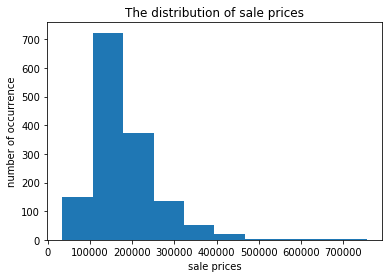

In [72]:
# target --- saleprice seems to be distributed non-normally.

plt.hist(house_prices_df.saleprice)
plt.title("The distribution of sale prices")
plt.xlabel("sale prices")
plt.ylabel("number of occurrence")
plt.show()

In [78]:
# target and numerical variables

np.abs(house_prices_df[numeric_columns].iloc[:,1:].corr().loc[:,"saleprice"]).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
garageyrblt      0.486362
masvnrarea       0.477493
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.351799
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

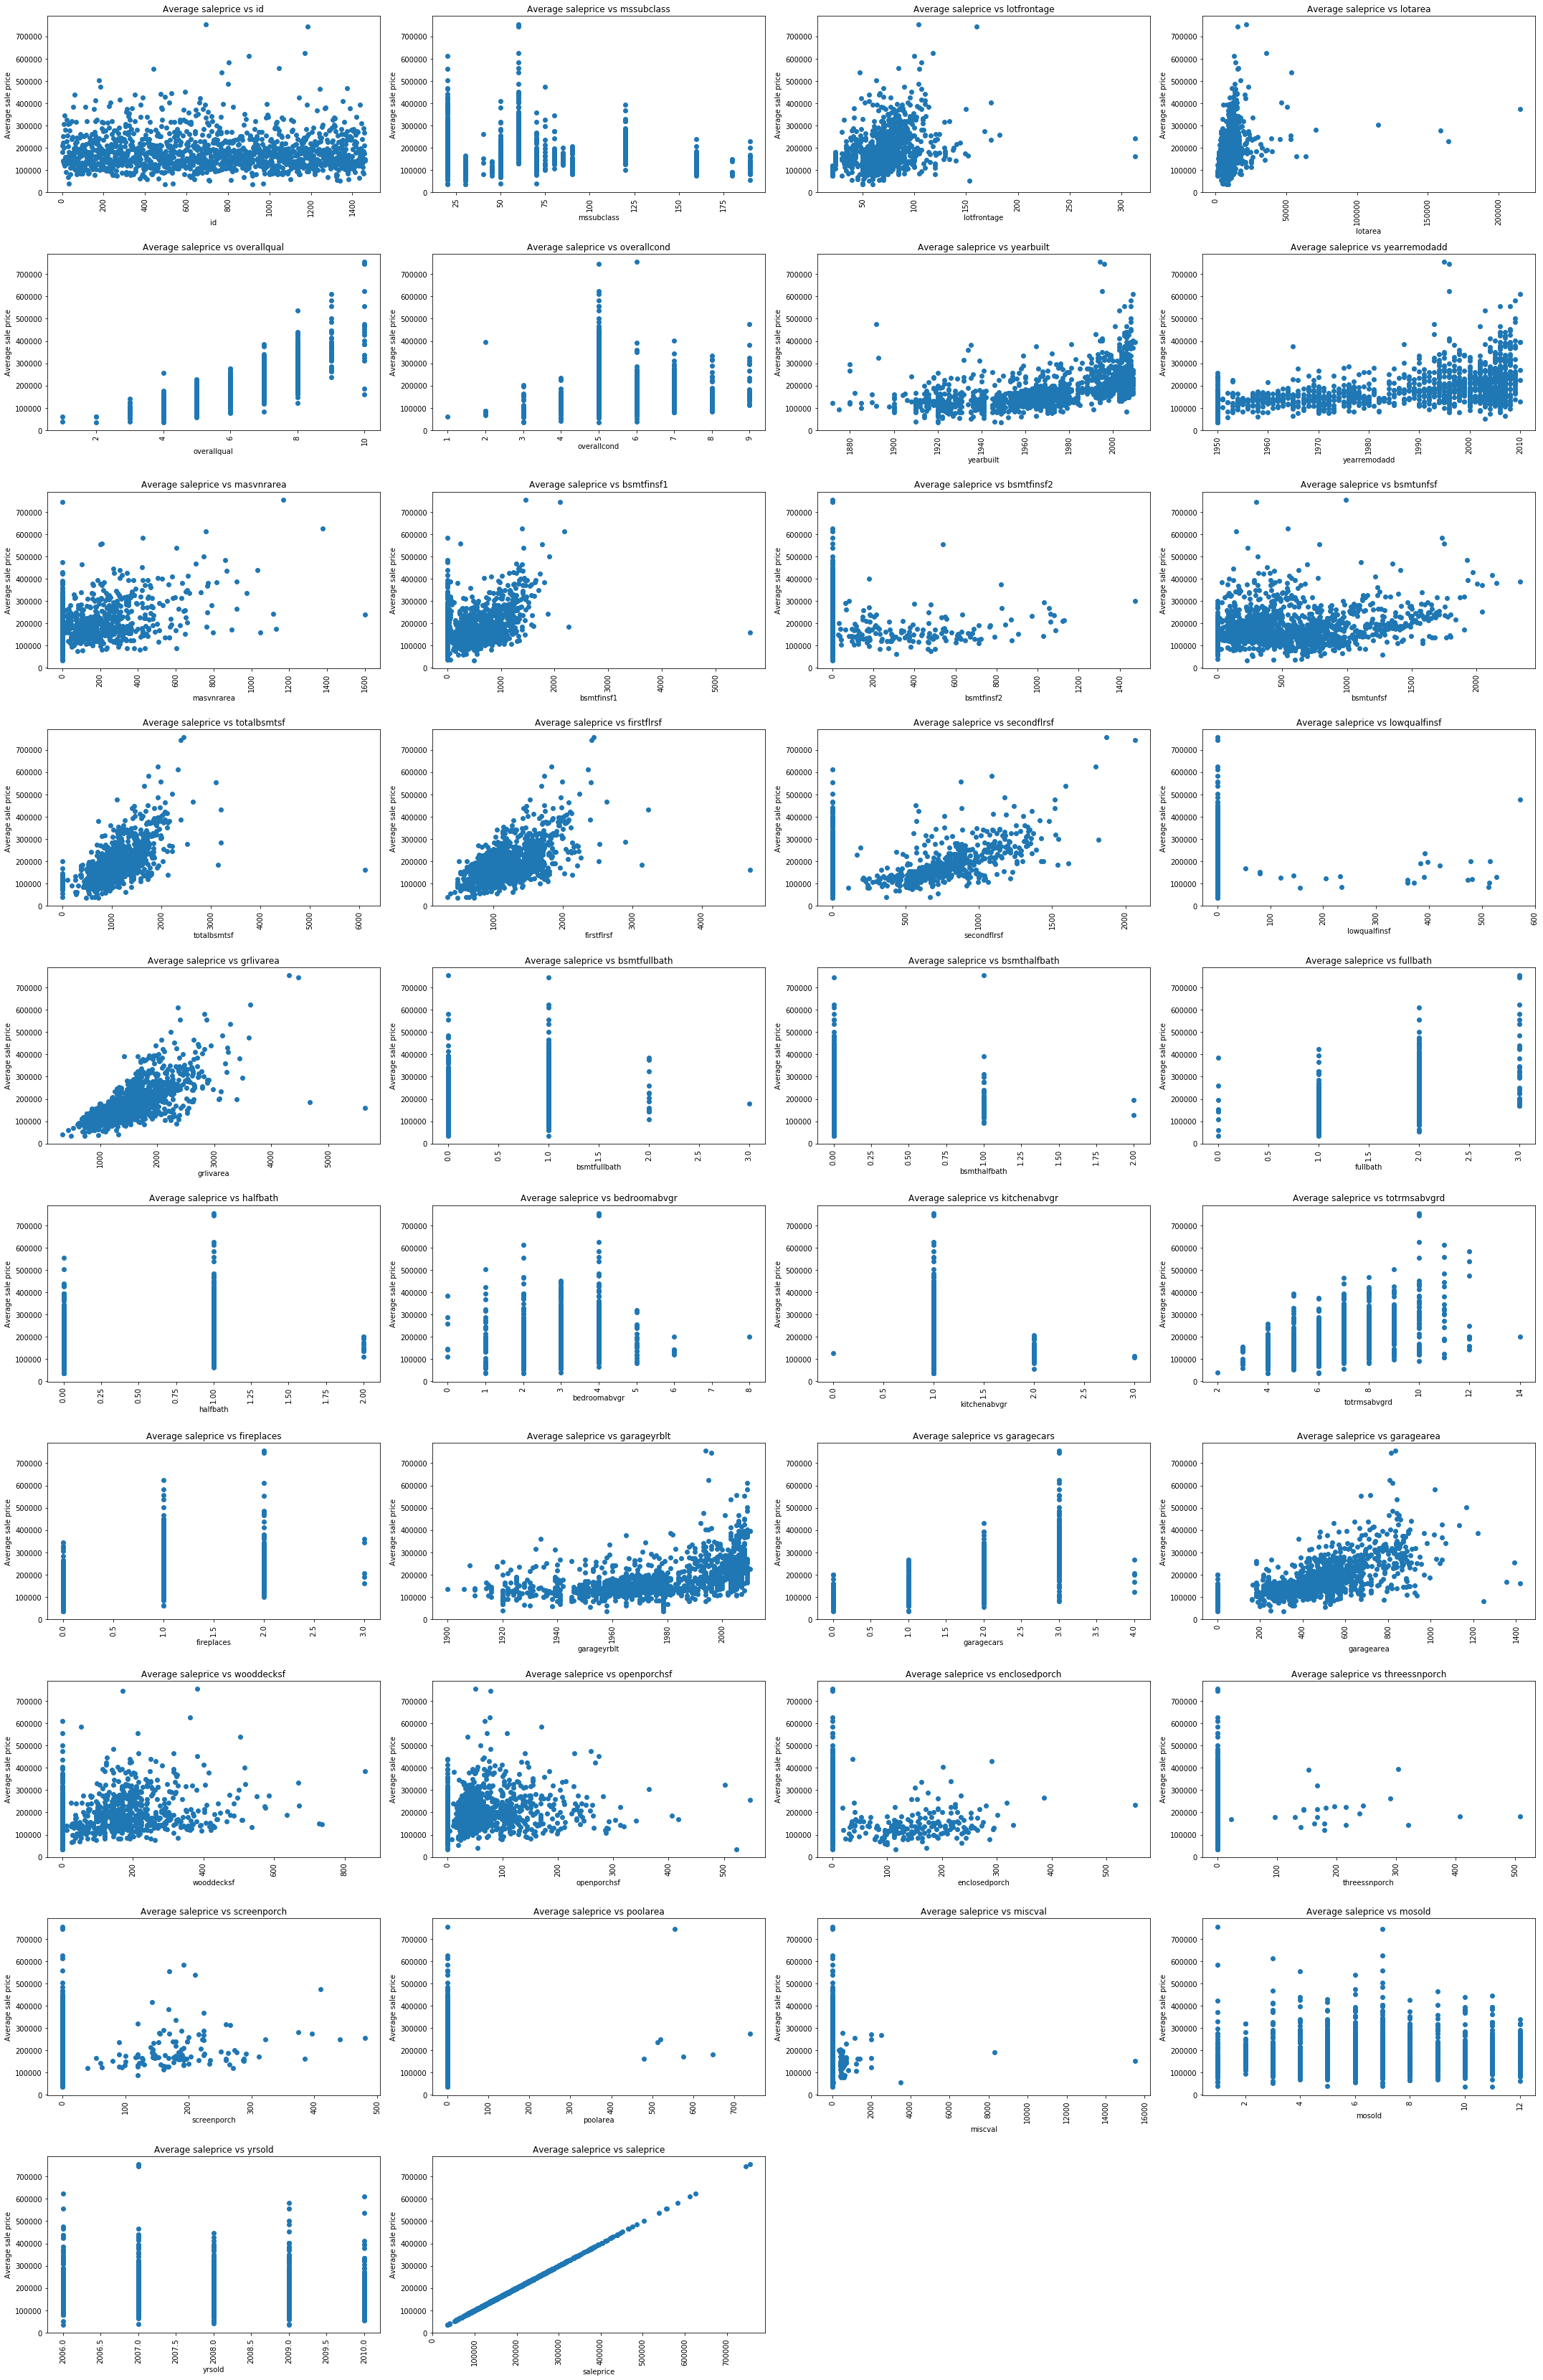

In [79]:
plt.figure(figsize=(30,50))

for i, column in enumerate(numeric_columns):
    plt.subplot(11,4,i+1)
    plt.scatter(df[column],df['saleprice'])
    plt.title(f"Average saleprice vs {column}")
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

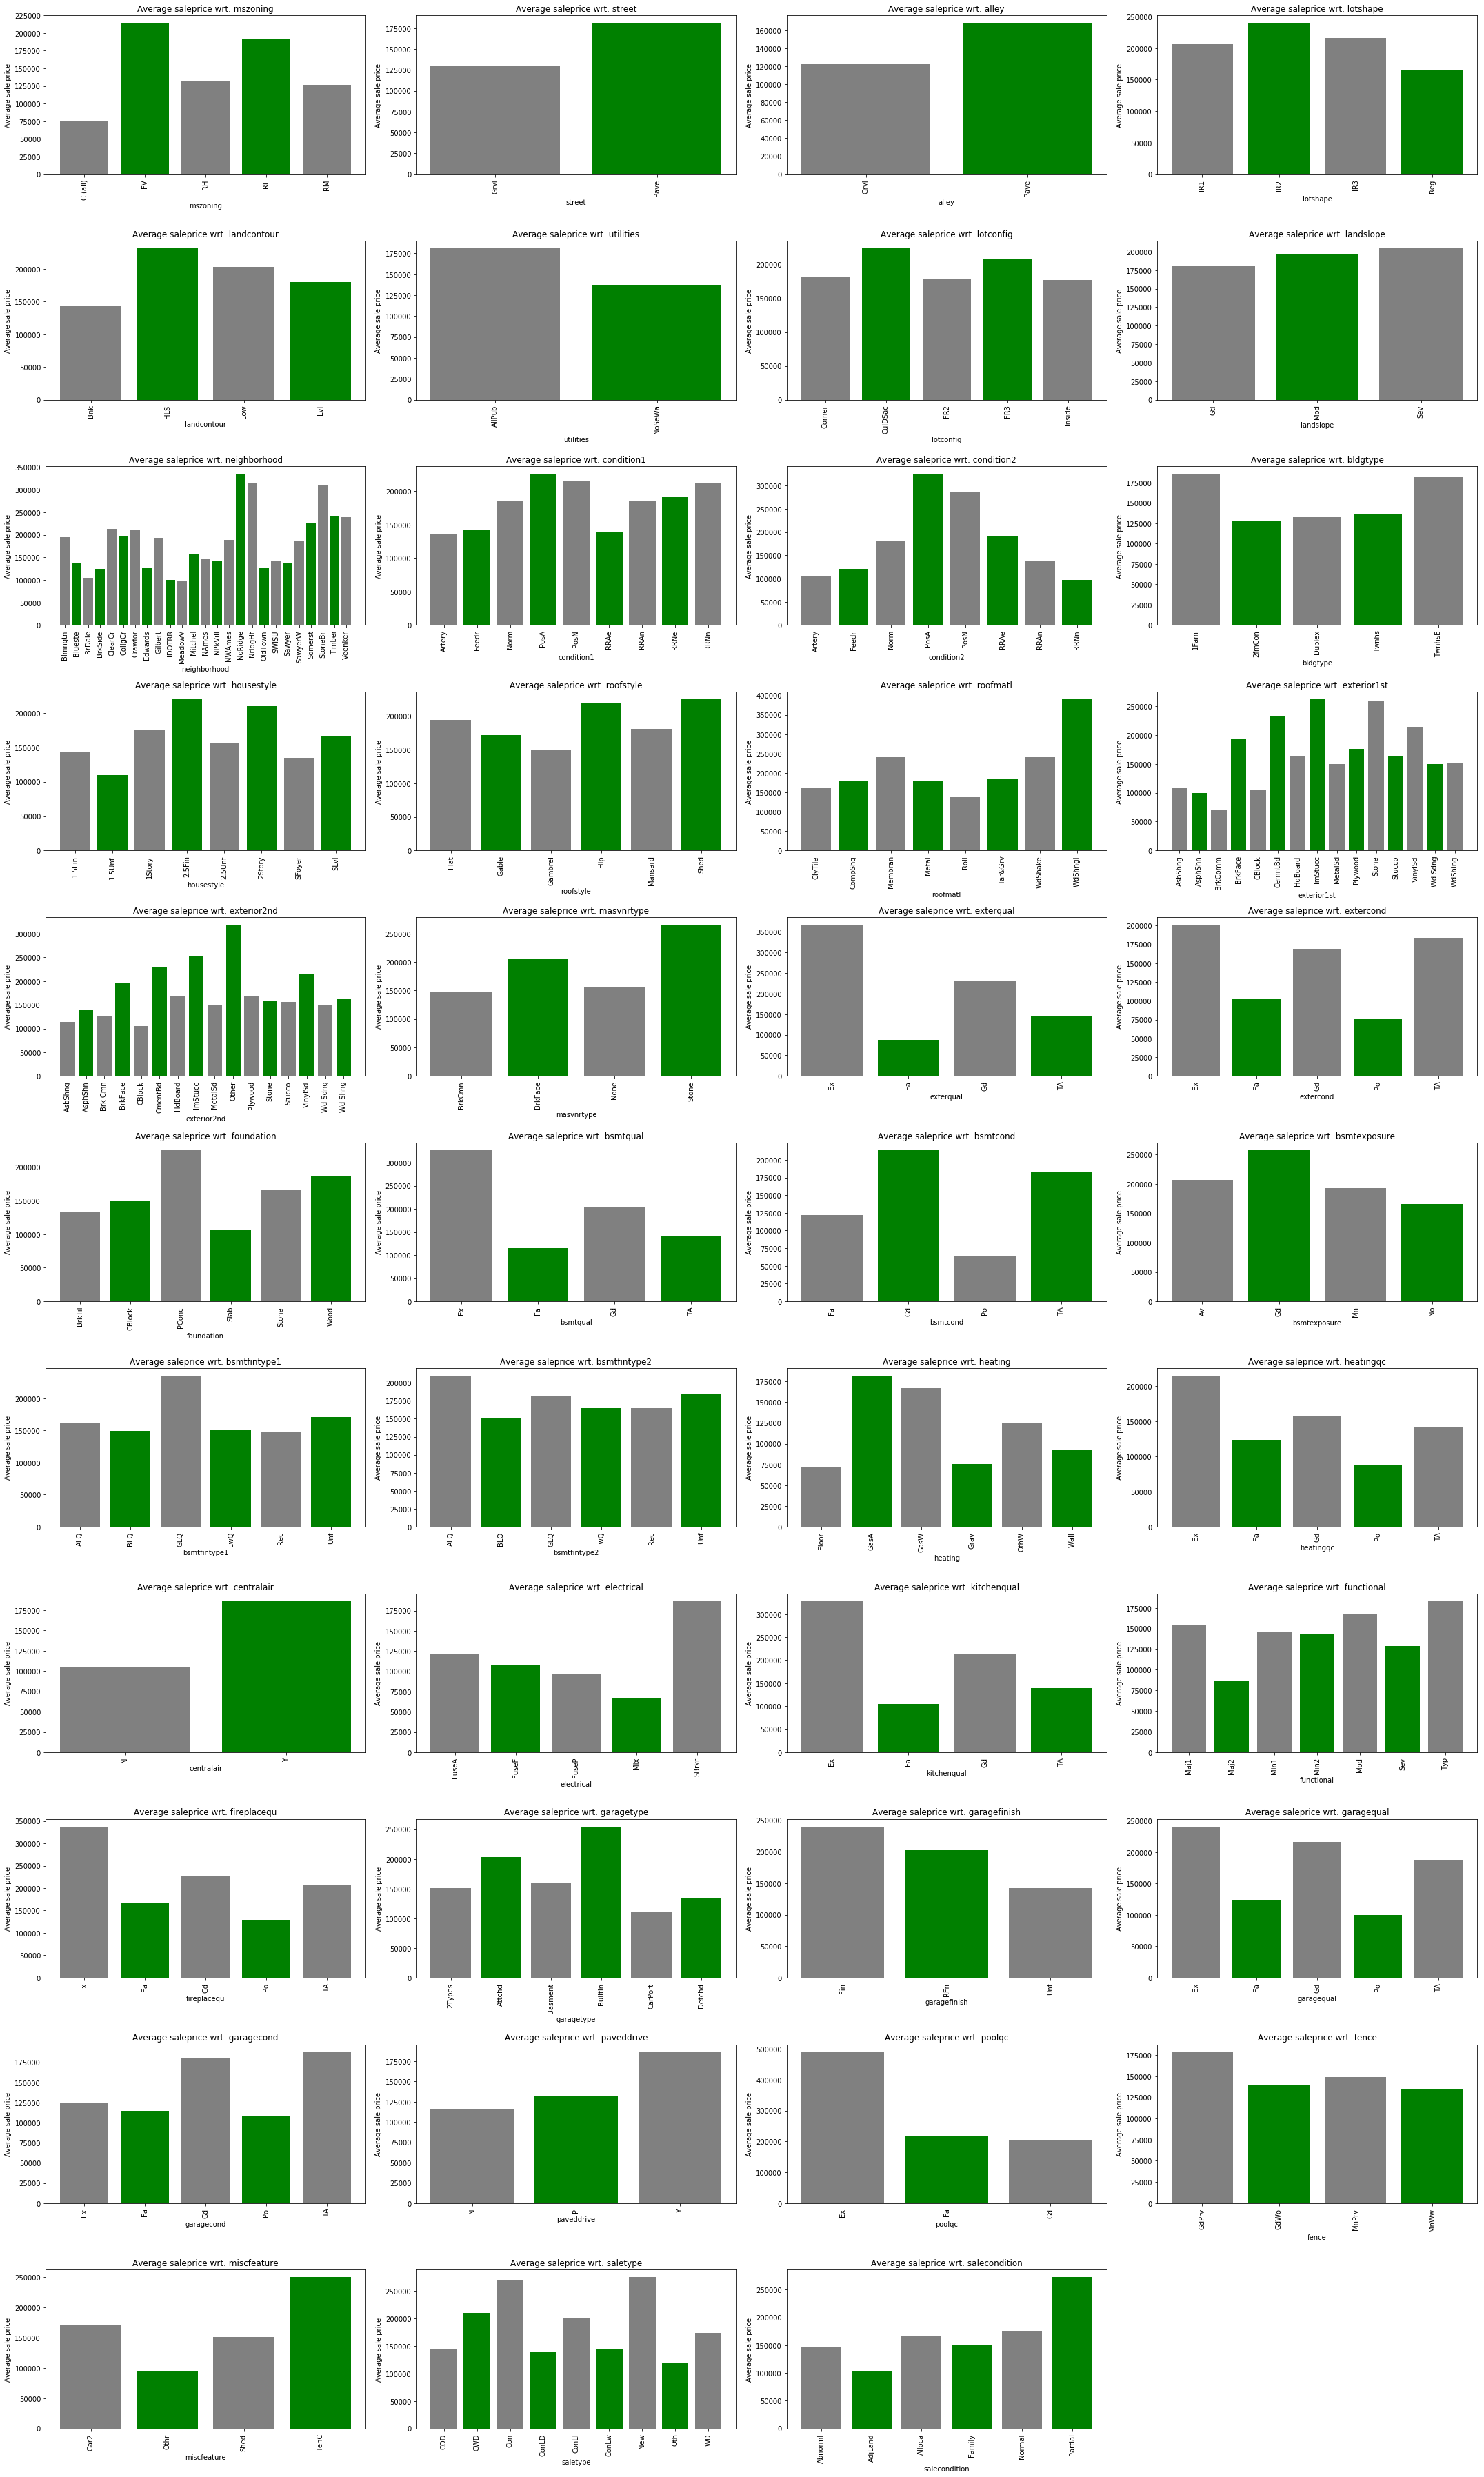

In [80]:
# target and non-numerical variables

plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric_columns):
    plt.subplot(11,4,index+1)
    plt.bar(house_prices_df.groupby(column)["saleprice"].mean().index, house_prices_df.groupby(column)["saleprice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

As our model, we choose the 5 numerical variables that are most correlated with the sale price:

overallqual     
grlivarea        
garagecars      
garagearea       
totalsf = totalbsmtsf + firstflrsf + secondflrsf

We also add two non-numerical features to our model as their values exhibit some variance with respect to the average sale price:

mszoning
street 

In order to use them in our model, we need to convert them to dummy variables.

In [81]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", 
                                                            drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", 
                                                            drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", 
                                         drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", 
                                                              drop_first=True).columns)

# 3. Now, split your data into train and test sets where 20% of the data resides in the test set.

In [101]:
house_prices_df['totalsf'] = house_prices_df['totalbsmtsf'] + house_prices_df['firstflrsf'] + house_prices_df['secondflrsf']

# Y is the target variable
Y = house_prices_df['saleprice']

# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf'] + dummy_column_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

# 4.Build several linear regression models including Lasso, Ridge, or ElasticNet and train them in the training set. Use k-fold cross-validation to select the best hyperparameters if your models include one!

R-squared of the model in training set is: 0.7685611943174666
-----Test set statistics-----
R-squared of the model in test set is: 0.768398628945512
Mean absolute error of the prediction is: 25575.557421903803
Mean squared error of the prediction is: 1554903069.5675125
Root mean squared error of the prediction is: 39432.25925010527
Mean absolute percentage error of the prediction is: 15.574968030363213


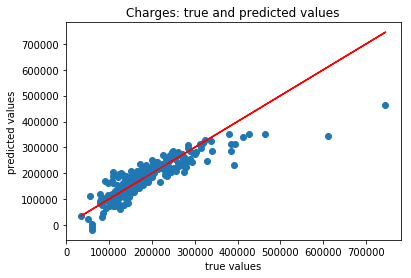

In [103]:
lrm = LinearRegression()

lrm.fit(X_train, y_train)

y_preds_test = lrm.predict(X_test)

print("R-squared of the model in training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))


plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()



Best alpha value is: 100.0
R-squared of the model in training set is: 0.7683493784117919
-----Test set statistics-----
R-squared of the model in test set is: 0.768535513016867
Mean absolute error of the prediction is: 25582.80977932705
Mean squared error of the prediction is: 1553984070.419297
Root mean squared error of the prediction is: 39420.604642994724
Mean absolute percentage error of the prediction is: 15.65755796823276
[ 2.44262990e+04  2.00459547e+01  1.31021799e+04  2.00562270e+01
  2.37380516e+01  5.83709698e+03 -0.00000000e+00  1.28922881e+04
 -7.22365937e+03 -0.00000000e+00]
-101672.0139652408


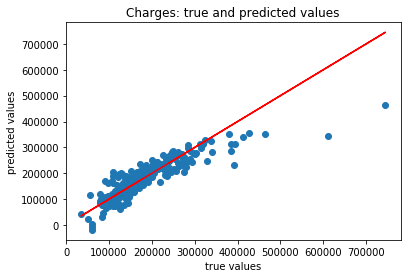

In [104]:
lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

print(lasso_cv.coef_)
print(lasso_cv.intercept_)


plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


Best alpha value is: 10.0
R-squared of the model in training set is: 0.7683920785360736
-----Test set statistics-----
R-squared of the model in test set is: 0.7685189474903761
Mean absolute error of the prediction is: 25570.895141865964
Mean squared error of the prediction is: 1554095286.4620705
Root mean squared error of the prediction is: 39422.01525115212
Mean absolute percentage error of the prediction is: 15.665615285612011


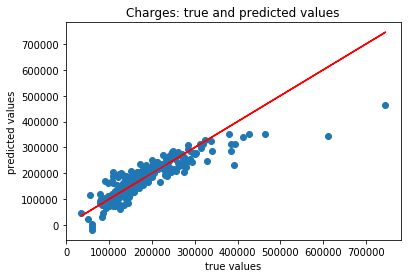

In [105]:
ridge_cv = RidgeCV(alphas=alphas, cv=5)

ridge_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridge_cv.predict(X_train)
y_preds_test = ridge_cv.predict(X_test)

print("Best alpha value is: {}".format(ridge_cv.alpha_))
print("R-squared of the model in training set is: {}".format(ridge_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()


Best alpha value is: 0.01
R-squared of the model in training set is: 0.768445511263291
-----Test set statistics-----
R-squared of the model in test set is: 0.7683313498842848
Mean absolute error of the prediction is: 25599.354593640484
Mean squared error of the prediction is: 1555354761.2753103
Root mean squared error of the prediction is: 39437.98627307574
Mean absolute percentage error of the prediction is: 15.676766768200832


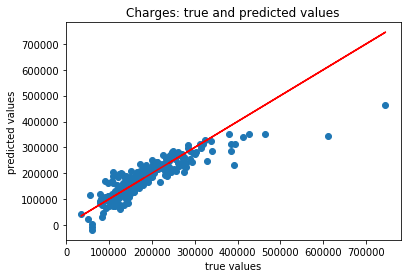

In [106]:
elasticnet_cv = ElasticNetCV(alphas=alphas, cv=5)

elasticnet_cv.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticnet_cv.predict(X_train)
y_preds_test = elasticnet_cv.predict(X_test)

print("Best alpha value is: {}".format(elasticnet_cv.alpha_))
print("R-squared of the model in training set is: {}".format(elasticnet_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(elasticnet_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

selection criteria:
the higher R-squared the better;
the lower the diff between  R-squared of training and testing model, the better;
the smaller MAE, MSE, RMSE, MAPE, the better.

based on the above criteria, Lasso gave the best result:
coef: 
[ 2.44262990e+04  2.00459547e+01  1.31021799e+04  2.00562270e+01
  2.37380516e+01  5.83709698e+03 -0.00000000e+00  1.28922881e+04
 -7.22365937e+03 -0.00000000e+00]
intercept: 
-101672.0139652408



# 5.Evaluate your best model on the test set.

---- lasso model

the model is able to explain 77% of the variance.
also the lasso model has:
-high R-squared;
-low diff between R-squared of training and testing model;
-small MAE, MSE, RMSE, MAPE.

# 6. So far, you have only used the features in the dataset. However, house prices can be affected by many factors like economic activity and the interest rates at the time they are sold. So, try to find some useful factors that are not included in the dataset. Integrate these factors into your model and assess the prediction performance of your model. Discuss the implications of adding these external variables into your model.

other useful factors that can affect housing price: GPD and interest rate.

In [108]:
# find unique years in the dataset
house_prices_df['yrsold'].unique()

# then google the gdp(million) and interest rate for those years 

array([2008, 2007, 2006, 2009, 2010], dtype=int64)

In [112]:
# These values were obtained from Google (source: World Bank)
gdp = [13.86,14.48,14.72,14.42,14.96]
int_rate = [5.87, 5.4, 2, 0.5, 0.75]

yrs = [i for i in range(2006,2011)]

gdp = {i:n for i in yrs for n in gdp}
int_rate = {i:n for i in yrs for n in int_rate}

# add the 2 columns
house_prices_df['gdp'] = [gdp[i] for i in house_prices_df['yrsold']]
house_prices_df['int_rate'] = [int_rate[i] for i in house_prices_df['yrsold']]

house_prices_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,salecondition,saleprice,mszoning_FV,mszoning_RH,mszoning_RL,mszoning_RM,street_Pave,totalsf,gdp,int_rate
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,Normal,208500,0,0,1,0,1,2566,14.96,0.75
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,Normal,181500,0,0,1,0,1,2524,14.96,0.75
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,Normal,223500,0,0,1,0,1,2706,14.96,0.75
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,Abnorml,140000,0,0,1,0,1,2473,14.96,0.75
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,Normal,250000,0,0,1,0,1,3343,14.96,0.75


In [113]:
Y = house_prices_df['saleprice']

# adding gdp and interest rate in the X
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalsf', 'gdp','int_rate'] + dummy_column_names]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

alphas = [np.power(10.0,p) for p in np.arange(-10,40,1)]

Best alpha value is: 100.0
R-squared of the model in training set is: 0.7683493784117917
-----Test set statistics-----
R-squared of the model in test set is: 0.768535513016867
Mean absolute error of the prediction is: 25582.809779327043
Mean squared error of the prediction is: 1553984070.4192967
Root mean squared error of the prediction is: 39420.60464299472
Mean absolute percentage error of the prediction is: 15.657557968232755
[ 2.44262990e+04  2.00459547e+01  1.31021799e+04  2.00562270e+01
  2.37380516e+01  0.00000000e+00  0.00000000e+00  5.83709698e+03
 -0.00000000e+00  1.28922881e+04 -7.22365937e+03 -0.00000000e+00]
-101672.0139652408


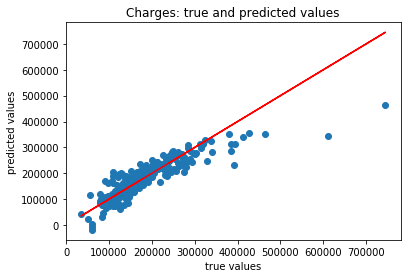

In [114]:
# run lasso again

lasso_cv = LassoCV(alphas=alphas, cv=5)

lasso_cv.fit(X_train, y_train)

y_preds_train = lasso_cv.predict(X_train)
y_preds_test = lasso_cv.predict(X_test)

print("Best alpha value is: {}".format(lasso_cv.alpha_))
print("R-squared of the model in training set is: {}".format(lasso_cv.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso_cv.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

print(lasso_cv.coef_)
print(lasso_cv.intercept_)


plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

the prediction of the new model is not better than the previous one: similar R square, MAE, MSE, RMSE, MAPE. 

the reason could be:
1. newly added variables are too general 
2. newly added variables only apply to 5 years, meaning not enough traning data. we should go back at least 10 years.
3. gdp and interest rate might have high correlation, but again only data from 5 years can not prove anything for sure